**Lab 1**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

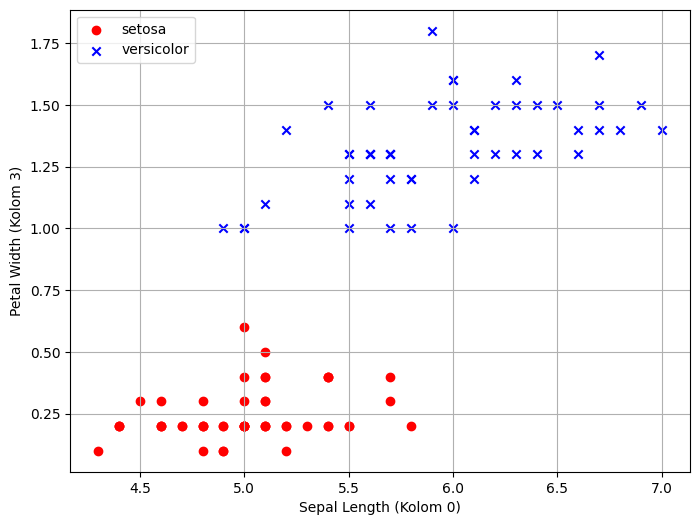

In [ ]:

# Memuat data dari 'iris (1).csv', melewati baris header (skiprows=1)
# dan memastikan penamaan kolom dengan indeks 0 hingga 4 (header=None).
df = pd.read_csv('/content/Iris.csv', header=None, skiprows=1)

# Mengonversi kolom fitur (0, 1, 2, 3) ke tipe data numerik.
for col in [0, 1, 2, 3]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# --- Visualisasi Data (Sama seperti kode asli) ---
# Kolom 0: Sepal Length, Kolom 3: Petal Width (digunakan di sini karena hasilnya lebih jelas)
setosa = df[df[4] == 'setosa'] # Perhatikan: label mungkin 'setosa' atau 'Iris-setosa'
versicolor = df[df[4] == 'versicolor']

# Jika data Anda memiliki label 'Iris-setosa' dan 'Iris-versicolor', gunakan:
# setosa = df[df[4] == 'Iris-setosa']
# versicolor = df[df[4] == 'Iris-versicolor']

a, b = 0, 3
plt.figure(figsize=(8, 6))
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

plt.xlabel('Sepal Length (Kolom 0)')
plt.ylabel('Petal Width (Kolom 3)')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [ ]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [ ]:

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 3]].values

In [ ]:

ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

print(f"Bobot Akhir (w0, w1, w2): {ppn.w_}")
print(f"Error per Epoch: {ppn.errors_}")

Bobot Akhir (w0, w1, w2): [0. 0. 0.]
Error per Epoch: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


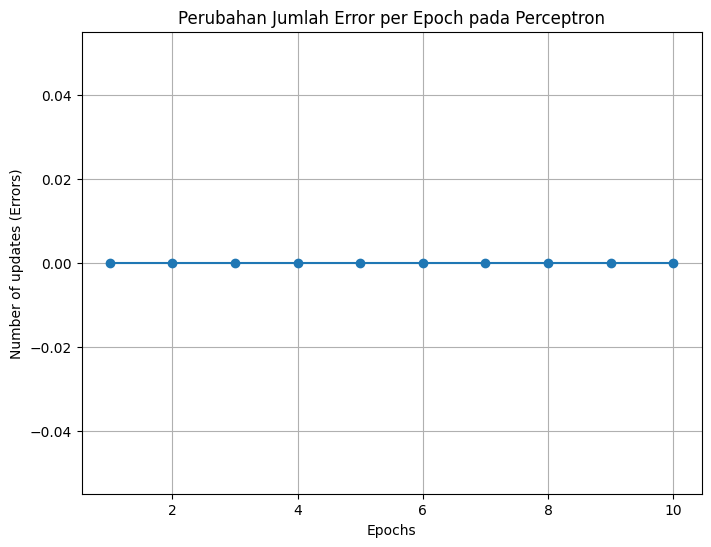

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates (Errors)')
plt.title('Perubahan Jumlah Error per Epoch pada Perceptron')
plt.grid()
plt.savefig('perceptron_errors_vs_epochs.png')

/tmp/ipython-input-4120316784.py:31: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)


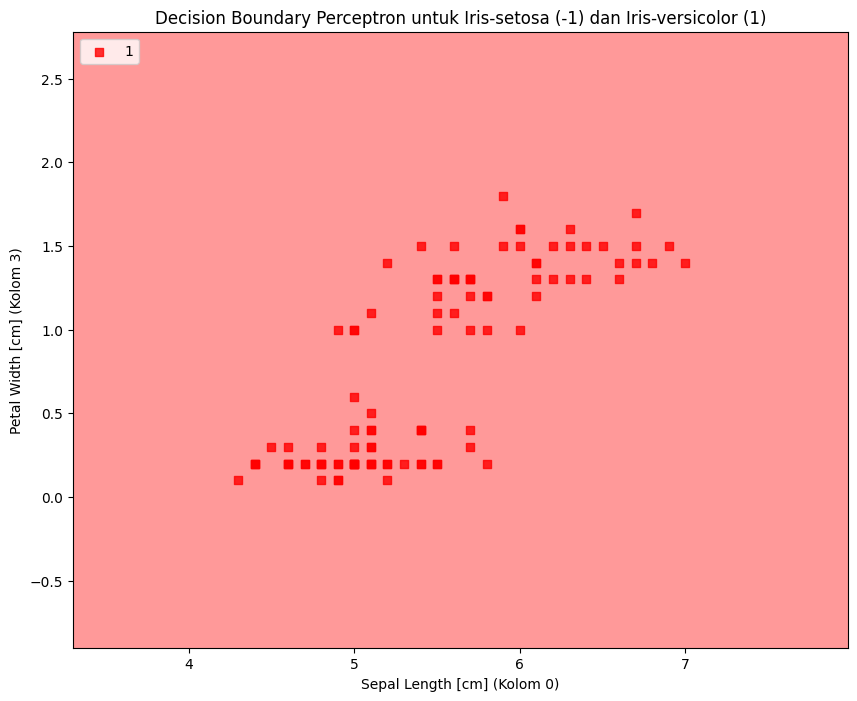

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# --- Langkah 7 - Membuat Fungsi plot_decision_regions ---
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    # Menggunakan np.unique(y) untuk menentukan jumlah kelas dan warna yang dibutuhkan
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision regions by creating a pair of grid arrays xx1 and xx2 via meshgrid function in Numpy
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # use predict method to predict the class labels z of the grid points
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # draw the contour using matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for i, cl in enumerate(np.unique(y)):
        # Mapping label -1 ke index 0 (merah) dan 1 ke index 1 (biru)
        # c=cmap(i) menggunakan index i dari cmap
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)

# --- Memanggil Fungsi untuk Visualisasi Decision Boundary ---
plt.figure(figsize=(10, 8))
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal Length [cm] (Kolom 0)')
plt.ylabel('Petal Width [cm] (Kolom 3)')
plt.title('Decision Boundary Perceptron untuk Iris-setosa (-1) dan Iris-versicolor (1)')
plt.legend(loc='upper left')
plt.savefig('perceptron_decision_boundary.png')


**Lab 2**

In [ ]:
from sklearn.neural_network import MLPClassifier


In [ ]:
y = [0, 1, 1, 0] # label
X = [[0, 0], [0, 1], [1, 0], [1, 1]] # data

In [ ]:
# Fit model
clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2,), max_iter=100, random_state=20)
clf.fit(X, y)


MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=100,
              random_state=20, solver='lbfgs')

In [ ]:
pred = clf.predict(X)
print('Accuracy: %s' % clf.score(X, y))
for i,p in enumerate(pred[:10]):
    print('True: %s, Predicted: %s' % (y[i], p))

Accuracy: 1.0
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 1, Predicted: 1
True: 0, Predicted: 0


**lab 3**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
dataset = pd.read_csv('/content/Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [ ]:
print(X)

[[0, 0], [0, 1], [1, 0], [1, 1]]


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])


In [ ]:

print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))


In [ ]:

print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
ann = tf.keras.models.Sequential()

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [ ]:

ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


**Training the Model**

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [ ]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5172 - loss: 0.7008
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7921 - loss: 0.5022
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7897 - loss: 0.4645
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8047 - loss: 0.4290
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8199 - loss: 0.4174
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8233 - loss: 0.4101
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8289 - loss: 0.3963
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8345 - loss: 0.3861
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8469 - loss: 0.3725
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8576 - loss: 0.3594
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8552 - loss: 0.3561
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

**Making Predictions**
Given the following information,

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: $ 60000

Number of Products: 2

Does this customer have a credit card? Yes

Is this customer an Active Member: Yes

Estimated Salary: $ 50000

Should this customer be retained?

Model the New Data and Make a Prediction

In [ ]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
[[False]]


In [ ]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1505   90]
 [ 190  215]]


0.86


**Lab 4**

In [ ]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import cv2

from skimage.feature import hog
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras import layers, models

In [ ]:
# Load images and labels from a directory structure
def load_dataset(img_dir):
    p = Path(img_dir)
    img_list = []
    for folder in p.glob('*'):
        label = folder.name
        for file in folder.glob('*.jpg'):
            img = cv2.imread(str(file))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img_list.append((img, label))
    return img_list

train_dir = "/content/drive/MyDrive/pembelajaran_mesin/images/images/training"
test_dir  = "/content/drive/MyDrive/pembelajaran_mesin/images/images/test"

train_img = load_dataset(train_dir)
test_img  = load_dataset(test_dir)


In [ ]:
# Preprocess images: resize and encode labels
def resize_image(img, size=(256,256)):
    return cv2.resize(img, size)

def label_encoder(label):
    return 1 if label == 'day' else 0

def preprocess(img_list):
    X = []
    y = []
    for img, label in img_list:
        img_std = resize_image(img)
        X.append(img_std)
        y.append(label_encoder(label))
    return X, y

X_train_img, y_train = preprocess(train_img)
X_test_img,  y_test  = preprocess(test_img)

In [ ]:
# Extract HOG features
def extract_hog(X_imgs):
    feats = []
    for img in X_imgs:
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        hog_feat = hog(gray,
                       orientations=9,
                       pixels_per_cell=(8,8),
                       cells_per_block=(2,2),
                       block_norm='L2-Hys',
                       visualize=False,
                       feature_vector=True)
        feats.append(hog_feat)
    return np.array(feats)

X_train_feat = extract_hog(X_train_img)
X_test_feat  = extract_hog(X_test_img)

In [ ]:
# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_feat)
X_test_scaled  = scaler.transform(X_test_feat)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_scaled, y_train,
    test_size=0.2,
    random_state=42
)

# Convert label ke numpy array
y_train = np.array(y_train)
y_val   = np.array(y_val)
y_test  = np.array(y_test)

In [ ]:
input_dim = X_train.shape[1]

model = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │     4,428,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,436,737 (16.92 MB)

 Trainable params: 4,436,737 (16.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val)
)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - accuracy: 0.7206 - loss: 0.7731 - val_accuracy: 1.0000 - val_loss: 2.2406e-04
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.9931 - loss: 0.0650 - val_accuracy: 1.0000 - val_loss: 1.9215e-04
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 1.0000 - loss: 9.6696e-05 - val_accuracy: 1.0000 - val_loss: 0.0135
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.9963 - loss: 0.0035 - val_accuracy: 1.0000 - val_loss: 3.1547e-04
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 1.0000 - loss: 1.0254e-05 - val_accuracy: 1.0000 - val_loss: 3.8281e-04
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 1.0000 - loss: 2.5453e-05 - val_accuracy: 1.0000 - val_loss: 4.3988e-04
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.9963 - loss: 0.0298 - val_accuracy: 1.0000 - val_loss: 3.7107e-04
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.9981 - loss: 0.0058 - val

In [ ]:
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print("Akurasi Test:", test_acc)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.8864 - loss: 0.6228
Akurasi Test: 0.8757764101028442


In [ ]:

y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        80
           1       0.86      0.90      0.88        81

    accuracy                           0.88       161
   macro avg       0.88      0.88      0.88       161
weighted avg       0.88      0.88      0.88       161

[[68 12]
 [ 8 73]]


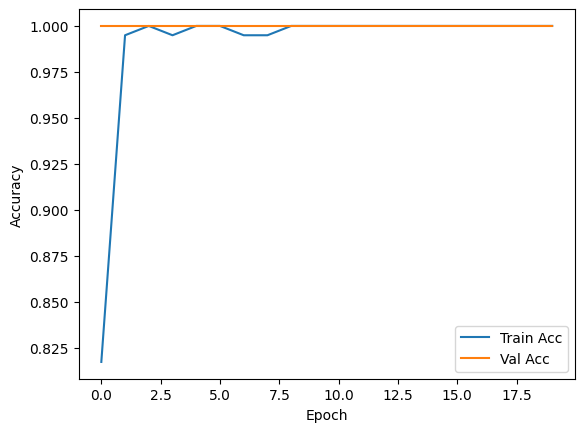

In [ ]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
model.save('day_night_classifier_model.h5')

**Lab Assignment**

In [ ]:
import tensorflow as tf

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [ ]:
import numpy as np

# Reshape image data from 2D (28x28) to 1D (784)
x_train_reshaped = x_train.reshape(x_train.shape[0], -1)
x_test_reshaped = x_test.reshape(x_test.shape[0], -1)

# Normalize pixel values
x_train_normalized = x_train_reshaped.astype('float32') / 255.0
x_test_normalized = x_test_reshaped.astype('float32') / 255.0

# Convert labels to one-hot encoded format
num_classes = 10 # MNIST has 10 classes (digits 0-9)
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes)

print("x_train_normalized shape:", x_train_normalized.shape)
print("x_test_normalized shape:", x_test_normalized.shape)
print("y_train_one_hot shape:", y_train_one_hot.shape)
print("y_test_one_hot shape:", y_test_one_hot.shape)

x_train_normalized shape: (60000, 784)
x_test_normalized shape: (10000, 784)
y_train_one_hot shape: (60000, 10)
y_test_one_hot shape: (10000, 10)


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(784,)), # Explicitly define the input layer
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print("Model compiled successfully.")

Model compiled successfully.


In [ ]:
history = model.fit(x_train_normalized, y_train_one_hot, epochs=10, batch_size=32, validation_split=0.2)
print("Model training complete.")


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8814 - loss: 0.3945 - val_accuracy: 0.9648 - val_loss: 0.1166
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.9694 - loss: 0.0966 - val_accuracy: 0.9724 - val_loss: 0.0943
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9817 - loss: 0.0602 - val_accuracy: 0.9684 - val_loss: 0.1125
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9855 - loss: 0.0452 - val_accuracy: 0.9727 - val_loss: 0.1018
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9885 - loss: 0.0355 - val_accuracy: 0.9798 - val_loss: 0.0798
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9918 - loss: 0.0234 - val_accuracy: 0.9760 - val_loss: 0.0998
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9924 - loss: 0.0227 - val_accuracy: 0.9787 - val_loss: 0.0861
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9950 - loss: 0.015

**Visualize Training History**

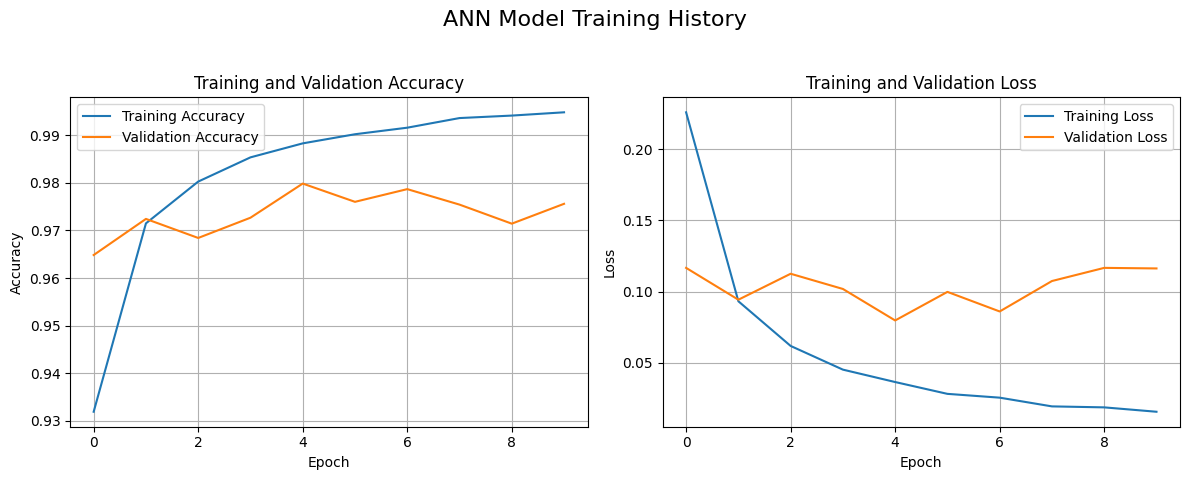

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
plt.figure(figsize=(12, 5))

# Subplot 1: Accuracy
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)

# Subplot 2: Loss
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)

# Add a main title to the figure
plt.suptitle('ANN Model Training History', fontsize=16)

# Adjust layout to prevent overlap and display the plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust rect to make space for suptitle
plt.show()

**Make Sample Predictions and Visualize**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


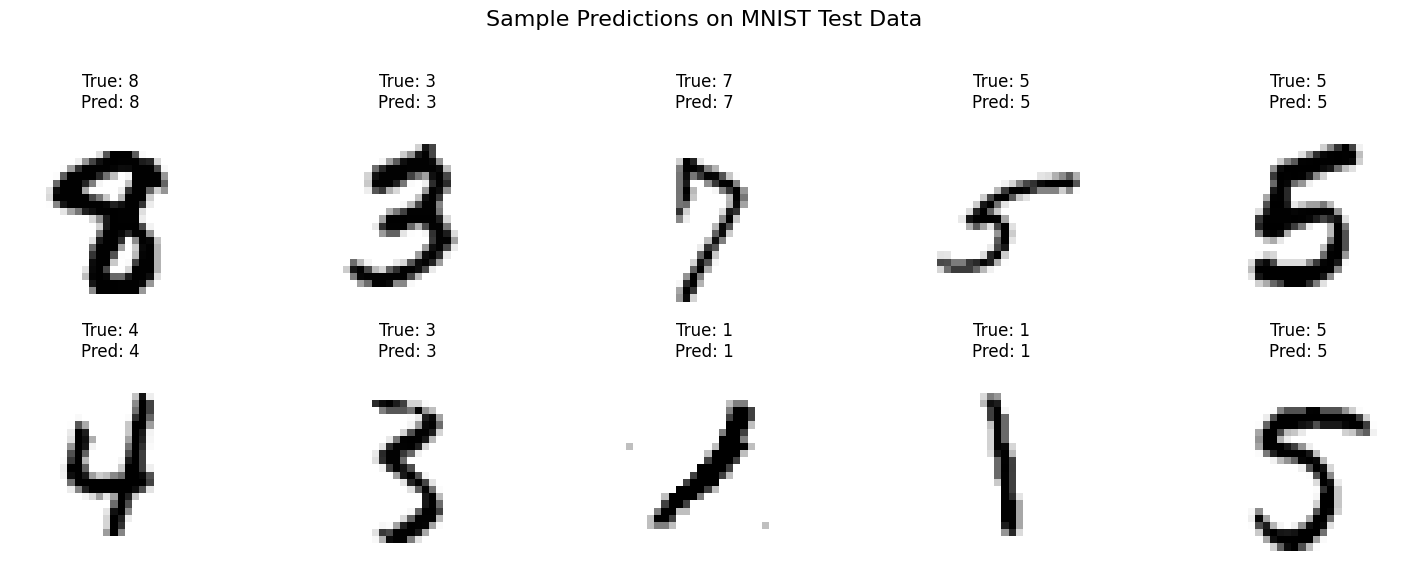

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Select a random sample of 10 indices from the test dataset
num_samples_to_show = 10
random_indices = np.random.choice(len(x_test), num_samples_to_show, replace=False)

# Get the corresponding original images, true labels, and normalized data for prediction
sample_images = x_test[random_indices]
sample_true_labels = y_test[random_indices]
sample_normalized_data = x_test_normalized[random_indices]

# Use the trained model to predict class probabilities for the selected images
sample_predictions_prob = model.predict(sample_normalized_data)

# Convert predicted probabilities to predicted class labels
sample_predicted_labels = np.argmax(sample_predictions_prob, axis=1)

# Create a figure with subplots to display the selected images
plt.figure(figsize=(15, 6))

for i in range(num_samples_to_show):
    plt.subplot(2, 5, i + 1) # Arrange in 2 rows, 5 columns
    plt.imshow(sample_images[i], cmap=plt.cm.binary) # Display original image
    plt.title(f"True: {sample_true_labels[i]}\nPred: {sample_predicted_labels[i]}")
    plt.axis('off')

plt.suptitle('Sample Predictions on MNIST Test Data', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent overlap with suptitle
plt.show()

**Final Task**

Subtask:

Data Analysis Key Findings
The trained Artificial Neural Network (ANN) model achieved a test loss of 0.1018 and a test accuracy of 0.9788 (97.88%) on the unseen test dataset.
Training history plots were successfully generated, illustrating the model's learning progression by showing both training and validation accuracy and loss over epochs.
Random sample predictions were made on 10 test images, and these images were visualized along with their true labels and the model's predicted labels, allowing for a visual assessment of the model's performance on individual cases.

Insights or Next Steps
The model demonstrates strong generalization capabilities, as indicated by its high accuracy and low loss on the unseen test data, suggesting it is well-suited for the MNIST digit classification task.
Further analysis could involve investigating specific misclassified samples from the visualization step to understand common patterns or types of errors the model makes, which might inform future model improvements.